In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
test_csv = pd.read_csv("/opt/ml/dataset/test/test_data.csv")
submission_csv = pd.read_csv("./prediction/8_RL_ST_TP_SingleSentence.csv")
submission_my_sota_csv = pd.read_csv("./prediction/7.RL_ST_NO_typed_entity_punc_input_8000_mybest.csv")
sota_csv = pd.read_csv("./prediction/submission_jh.csv")

## 1. "예측 / SOTA 값" 비교 (태일)

In [163]:
sentences = test_csv["sentence"]
subject_entities, object_entities = test_csv["subject_entity"], test_csv["object_entity"] 
my_labels = submission_csv["pred_label"]
sota_labels = sota_csv["pred_label"]

In [164]:
i = -1
cnt = 0
# while i < 50: # 전체 텍스트: len(my_labels) - 1

while i < len(my_labels)-1:
    i += 1
    if my_labels[i] == sota_labels[i]:
        continue
    cnt += 1
    print(f"{cnt}: {sentences[i]}")
    print(f"sub:{eval(subject_entities[i])['word']}, obj:{eval(object_entities[i])['word']}")
    print(f"예측: {my_labels[i]}, sota: {sota_labels[i]}")
    print()
print(f"num of diff: {cnt} / {i}")

1: 실제로 틱톡의 ‘극한반전 챌린지’는 제2의 이병헌 감독을 꿈꾸는 영화 꿈나무들과 영상 꿈나무들 사이에서는 반드시 참여해야 하는 챌린지로 자리매김하고 있다.
sub:틱톡, obj:이병헌
예측: no_relation, sota: org:top_members/employees

2: 한편, 시는 3E 정책에 대한 아이디어가 있는 시민들은 누구나 정책을 제안 할 수 있도록 시청 홈페이지 ‘정책소통 1번가’를 통해 온-라인으로도 제안을 접수받고 있다.
sub:시, obj:3E
예측: no_relation, sota: org:product

3: 도착이 늦어져 리산드로스를 죽게 한 파우사니아스는 재판에 회부당했고, 유죄 판결이 내려지기 전에 테게아로 망명했다.
sub:리산드로스, obj:테게아
예측: per:place_of_death, sota: no_relation

4: 무령왕의 왕위를 계승한 성왕(재위 523 ~ 554년)도 일본과의 우호관계를 이어갔다.
sub:무령왕, obj:554년
예측: per:date_of_death, sota: no_relation

5: A 씨는 대구 방문 6일째 질병관리본부에 전화했다.
sub:A, obj:대구
예측: per:place_of_residence, sota: no_relation

6: 이날 협약식에는 경남대 최호성 대외부총장과 거제 라마다 스위츠 거제호텔 정행철 대표이사를 비롯해 경남대 관광학부 선종갑, 박한수 교수 및 관계자가 참석한 가운데 진행됐다.
sub:라마다 스위츠 거제호텔, obj:경남대 관광학부
예측: no_relation, sota: org:member_of

7: 올해 동신대 수시 모집의 가장 큰 특징은 지역인재전형의 비중을 크게 늘리며 광주와 전남·북 지역 학생들의 입학 기회를 넓혔다는 점이다.
sub:동신대, obj:전남
예측: org:place_of_headquarters, sota: no_relation

8: 일찍이 이천(利川)의 율정(栗亭) 이관의(李寬義)의 문하에서 수학하였다.
sub:이

## 2. Check for Submission Distribution (찬국)
현재 자신의 모델이 잘 예측되었는지 시각적으로 확인하기 위한 코드입니다.  
해당 코드는 'no-relation으로 예측한 결과가 적으면, 그만큼 다른 label을 예측할 수 있기에 좋은 성능을 기대할 수 있을 것이다'라는 가설을 바탕으로 작성되었습니다.  
비교를 위해 리더보드에서 f1-score 70점을 달성한 재학님의 모델 예측 결과와 현재 자신의 submission의 분포를 비교할 수 있습니다.  
- 해당 코드는 distribution 확인을 위한 코드입니다. 기준 예측 결과는 추후 개선할 수 있습니다. 

In [165]:
# first_dataset
label_jh = sota_csv.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label_jh.reset_index(level=['pred_label'], inplace = True)
label_jh.drop('probs', axis=1, inplace=True)
label_jh.columns = ["pred_label", "count"]

In [166]:
# second_dataset
label = submission_csv.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label.reset_index(level=['pred_label'], inplace = True)
label.drop('probs', axis=1, inplace=True)
label.columns = ["pred_label", "count"]

In [174]:
# third_dataset
label2 = submission_my_sota_csv.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label2.reset_index(level=['pred_label'], inplace = True)
label2.drop('probs', axis=1, inplace=True)
label2.columns = ["pred_label", "count"]

## 2-1.Distribution

In [ ]:
# 병렬적으로 확인하고 싶다면, subplot을 1,2로 주고 0ax 부분을 주석해제시키면 됩니다. 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(y='pred_label', x='count', data=label_jh, ax = axes[0],
              color='red',alpha=0.5 ) # pallete:

sns.barplot(y='pred_label', x='count', data=label, ax = axes[0],
              color='gray',alpha=0.5 )
axes[0].set_title("New Submission Distribution")

sns.barplot(y='pred_label', x='count', data=label_jh, ax = axes[1],
              color='red',alpha=0.5 ) # pallete:

sns.barplot(y='pred_label', x='count', data=label2, ax = axes[1],
              color='gray',alpha=0.5 )
axes[0].set_title("New Submission Distribution")
axes[1].set_title("My Sota Distribution")

Text(0.5, 1.0, 'My Sota Distribution')

## 2-2.Difference

In [168]:
diff = label_jh['count'] - label['count']
diff_df =pd.DataFrame({"pred_label": label_jh['pred_label'], "diff":diff})

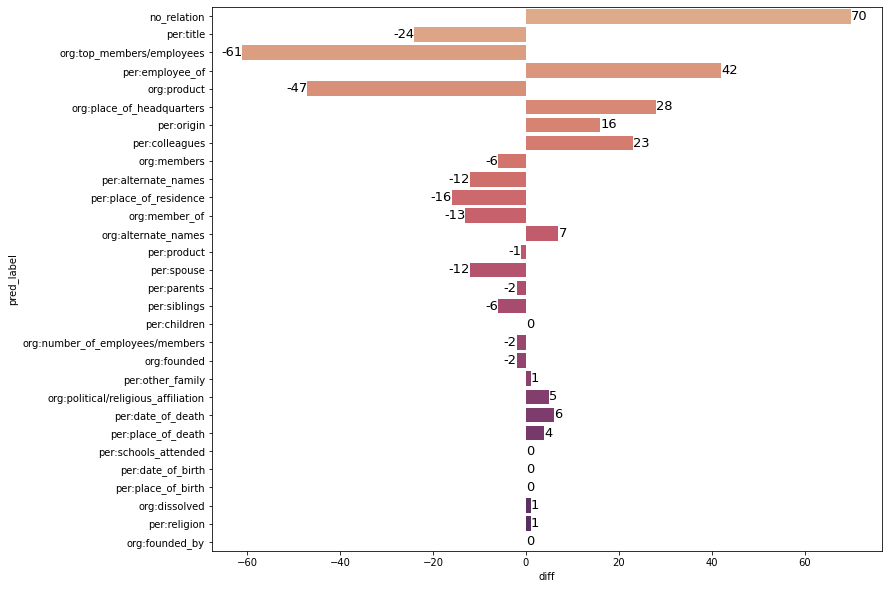

In [169]:
# 병렬적으로 확인하고 싶다면, subplot을 1,2로 주고 0ax 부분을 주석해제시키면 됩니다. 
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y='pred_label', x='diff', data=diff_df, # ax = axes[0],
              palette='flare')
for i in ax.containers:
    ax.bar_label(i, fontsize=13)

## csv파일로 뽑기(나연 추가)

In [146]:
from load_data import *
from train import *

test_csv = pd.read_csv("/opt/ml/dataset/test/test_data.csv")
test_csv = preprocessing_dataset(test_csv, marking_mode='normal')

res_df = pd.DataFrame()
res_df['sentence'] = test_csv['sentence']
res_df['sub'] = test_csv["subject_entity"]
res_df['obj'] = test_csv["object_entity"] 

res_df['sota'] = sota_csv["pred_label"]
res_df['my'] = submission_csv["pred_label"]

diff_df = res_df[res_df['sota'] != res_df['my']]  # sota와 다른 부분만
diff_df.to_csv("sub_eda.csv", index=False, encoding="utf-8-sig")  # 저장
diff_df
# res_df

TypeError: preprocessing_dataset() missing 1 required positional argument: 'filter'